# Importing Libraries

In [12]:
import numpy as np
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [14]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

Visualising and Performing Prediction on Single image

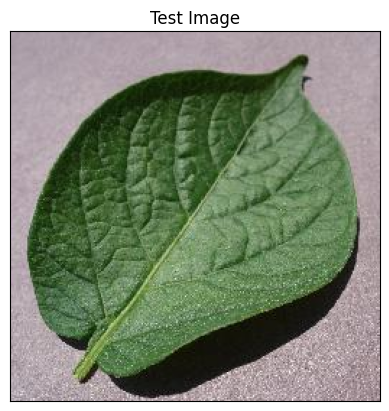

In [19]:
#Test Image Visualization
import cv2
# image_path = 'test/test/AppleCedarRust1.JPG'
# image_path = 'test/test/TomatoYellowCurlVirus6.JPG'
image_path = 'test/test/PotatoHealthy2.JPG'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [21]:
print(predictions)

[[3.3881715e-06 7.4752352e-05 3.6015913e-07 3.4475166e-04 9.2322596e-05
  2.3463575e-05 1.3158993e-02 1.1108970e-08 2.6468450e-07 3.7989336e-09
  9.1597832e-09 1.9421632e-06 7.1044365e-06 5.0959827e-08 1.4140356e-07
  1.8706649e-07 9.7564957e-08 1.5160560e-06 2.5489967e-04 2.4901242e-03
  2.1894359e-06 1.4065175e-05 9.8319834e-01 1.0818807e-05 2.8536489e-04
  9.0198897e-09 4.0292152e-09 8.9007119e-07 1.6101860e-07 1.4039639e-06
  2.4390230e-05 2.8511306e-06 4.3714094e-06 9.5219470e-08 4.1531018e-07
  3.2336107e-08 1.8650324e-07 2.1242693e-08]]


In [22]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


In [23]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
print("Disease Name: ",model_prediction)

Disease Name:  Potato___healthy


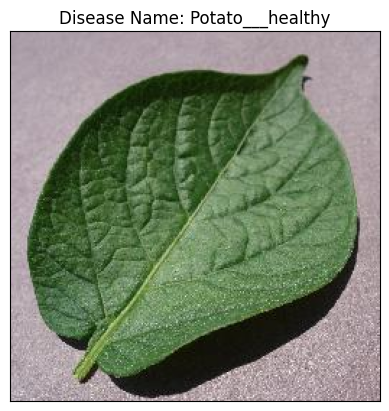

In [24]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import requests
import streamlit as st
import tensorflow as tf
import numpy as np
import json
from datetime import datetime
import folium
from streamlit_folium import st_folium
import pickle


model = tf.keras.models.load_model("trained_plant_disease_model.keras")


# Tensorflow Model Prediction
def model_prediction(test_image):
    image = tf.keras.preprocessing.image.load_img(test_image, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions)  # return index of max element


# Sidebar
st.sidebar.title("Plant Disease Dashboard")
app_mode = st.sidebar.radio(
    "Navigate",
    ["Home", "About", "Disease Recognition","Crop Recommendation","Weather"],
    index=0,
    help="Use the navigation to explore the app!"
)

# Styling for the app
st.markdown(
    """
    <style>
    .main-header {
        text-align: center;
        color: #90EE90;
        font-size: 36px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    .sub-header {
        color: #4682B4;
        font-size: 24px;
        font-weight: semi-bold;
    }
    .custom-button {
        background-color: #4682B4;
        color: white;
        font-weight: bold;
        border-radius: 8px;
        padding: 8px 20px;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Main Page
if app_mode == "Home":
    st.markdown('<div class="main-header">FarmView : Transforming Agriculture with AI</div>',
                unsafe_allow_html=True)
    # st.image("home_page.jpg", use_column_width=True)
    st.image("home_page.jpg")

    st.markdown("""
    Welcome to the **Plant Disease Recognition System**! 🌿🔍

    **How It Works:**
    - Upload an image of a plant with suspected disease.
    - The system will analyze it to detect potential diseases.
    - Get results and recommendations instantly!

    ### Features
    - **High Accuracy:** Using advanced ML algorithms.
    - **User-Friendly:** Intuitive interface for easy use.
    - **Fast Results:** Quick analysis for prompt action.

    Navigate to the **Disease Recognition** page to start.
    """)

# About Project
elif app_mode == "About":
    st.markdown('<div class="main-header">About the Project</div>', unsafe_allow_html=True)
    st.markdown("""
    ### Dataset Information
    - The dataset is derived from a public repository, containing 87K images of healthy and diseased crops.
    - Categorized into 38 classes, split into training (80%) and validation (20%).

    **Dataset Content:**
    - **Train:** 70,295 images
    - **Test:** 33 images
    - **Validation:** 17,572 images
    """)

# Disease Recognition
elif app_mode == "Disease Recognition":
    st.markdown('<div class="main-header">Disease Recognition</div>', unsafe_allow_html=True)
    test_image = st.file_uploader("Upload an Image", type=["jpg", "jpeg", "png"])

    if test_image:
        # st.image(test_image, use_column_width=True, caption="Uploaded Image")
        st.image(test_image, caption="Uploaded Image")

    if st.button("Predict", key="predict_button", help="Click to predict disease"):
        st.snow()
        st.write("Analyzing Image...")
        result_index = model_prediction(test_image)
        class_name = [
            'Apple: Apple scab',
            'Apple: Black rot',
            'Apple: Cedar apple rust',
            'Apple: Healthy',
            'Blueberry: Healthy',
            'Cherry (including sour): Powdery mildew',
            'Cherry (including sour): Healthy',
            'Corn (maize): Cercospora leaf spot, Gray leaf spot',
            'Corn (maize): Common rust',
            'Corn (maize): Northern Leaf Blight',
            'Corn (maize): Healthy',
            'Grape: Black rot',
            'Grape: Esca (Black Measles)',
            'Grape: Leaf blight (Isariopsis Leaf Spot)',
            'Grape: Healthy',
            'Orange: Huanglongbing (Citrus greening)',
            'Peach: Bacterial spot',
            'Peach: Healthy',
            'Pepper (bell): Bacterial spot',
            'Pepper (bell): Healthy',
            'Potato: Early blight',
            'Potato: Late blight',
            'Potato: Healthy',
            'Raspberry: Healthy',
            'Soybean: Healthy',
            'Squash: Powdery mildew',
            'Strawberry: Leaf scorch',
            'Strawberry: Healthy',
            'Tomato: Bacterial spot',
            'Tomato: Early blight',
            'Tomato: Late blight',
            'Tomato: Leaf Mold',
            'Tomato: Septoria leaf spot',
            'Tomato: Spider mites (Two-spotted spider mite)',
            'Tomato: Target Spot',
            'Tomato: Tomato Yellow Leaf Curl Virus',
            'Tomato: Tomato mosaic virus',
            'Tomato: Healthy'
        ]
        plant_disease_treatments = {
            "Apple: Apple scab": "Apply fungicides during the early season. Remove and destroy fallen leaves and infected fruit. Use resistant apple varieties.",
            "Apple: Black rot": "Prune and destroy infected twigs, branches, and fruits. Apply fungicides preventatively. Maintain tree health with proper fertilization and watering.",
            "Apple: Cedar apple rust": "Apply fungicides early in the season. Remove nearby cedar trees if possible, as they are alternate hosts.",
            "Apple: Healthy": "No treatment needed. Maintain regular care to keep the plant healthy.",
            "Blueberry: Healthy": "No treatment needed. Ensure proper soil conditions and adequate watering.",
            "Cherry (including sour): Powdery mildew": "Apply sulfur-based or fungicidal sprays. Increase air circulation and avoid overhead watering.",
            "Cherry (including sour): Healthy": "No treatment needed. Continue regular disease prevention practices.",
            "Corn (maize): Cercospora leaf spot, Gray leaf spot": "Use resistant varieties. Apply fungicides if necessary and practice crop rotation.",
            "Corn (maize): Common rust": "Plant resistant varieties and apply fungicides if needed. Maintain good field hygiene.",
            "Corn (maize): Northern Leaf Blight": "Use resistant seeds and rotate crops. Apply fungicides if required.",
            "Corn (maize): Healthy": "No treatment needed. Maintain regular care.",
            "Grape: Black rot": "Prune and remove infected vines. Apply fungicides in early spring. Ensure good air circulation.",
            "Grape: Esca (Black Measles)": "Remove infected wood. Ensure vines are not stressed and avoid trunk or root injuries.",
            "Grape: Leaf blight (Isariopsis Leaf Spot)": "Apply fungicides and prune affected leaves. Increase ventilation around vines.",
            "Grape: Healthy": "No treatment needed. Maintain proper care.",
            "Orange: Huanglongbing (Citrus greening)": "No known cure. Remove and destroy infected trees. Control psyllid vectors and plant disease-free stock.",
            "Peach: Bacterial spot": "Apply copper-based bactericides. Use resistant varieties if available. Prune and remove affected parts.",
            "Peach: Healthy": "No treatment needed. Ensure good tree health.",
            "Pepper (bell): Bacterial spot": "Apply copper-based sprays. Practice crop rotation and use certified disease-free seeds.",
            "Pepper (bell): Healthy": "No treatment needed. Maintain regular care.",
            "Potato: Early blight": "Apply fungicides and remove infected plant debris. Practice crop rotation.",
            "Potato: Late blight": "Use resistant varieties. Apply fungicides and destroy infected plants.",
            "Potato: Healthy": "No treatment needed. Continue regular monitoring.",
            "Raspberry: Healthy": "No treatment needed. Maintain proper care and disease prevention practices.",
            "Soybean: Healthy": "No treatment needed. Practice regular crop management.",
            "Squash: Powdery mildew": "Apply fungicides. Improve air circulation and avoid overhead watering.",
            "Strawberry: Leaf scorch": "Remove and destroy infected leaves. Apply appropriate fungicides.",
            "Strawberry: Healthy": "No treatment needed. Maintain regular care.",
            "Tomato: Bacterial spot": "Use copper sprays and disease-resistant seeds. Practice crop rotation.",
            "Tomato: Early blight": "Apply fungicides and remove affected plant parts.",
            "Tomato: Late blight": "Apply fungicides and remove and destroy infected plants. Use resistant varieties.",
            "Tomato: Leaf Mold": "Increase air circulation and apply fungicides. Prune lower leaves.",
            "Tomato: Septoria leaf spot": "Apply fungicides and remove infected leaves. Ensure good ventilation.",
            "Tomato: Spider mites (Two-spotted spider mite)": "Use insecticidal soap or horticultural oil. Increase humidity around plants.",
            "Tomato: Target Spot": "Apply fungicides and remove infected plant debris.",
            "Tomato: Tomato Yellow Leaf Curl Virus": "Control whitefly populations. Use resistant varieties and remove infected plants.",
            "Tomato: Tomato mosaic virus": "Remove and destroy infected plants. Sanitize tools and avoid tobacco products.",
            "Tomato: Healthy": "No treatment needed. Maintain regular plant care."
        }
        st.success(f'''
                   Disease is {class_name[result_index]} , 
                   Diagnosis:
                   \n
                   {plant_disease_treatments[class_name[result_index]]}
            ''')

elif app_mode == "Weather":


    # Load state and city data
    with open('weatherdata.json', 'r') as file:
        data = json.load(file)

    states = data.keys()

    # Title
    st.title("🌤️ Weather App with Map")
    st.markdown("Get **real-time weather updates** and view weather conditions on a map. 🗺️")

    # State and City Selection
    st.subheader("Select Your Location")
    state_name = st.selectbox(label="Select the State", options=states)

    if state_name:
        cities = data[state_name]
        city_name = st.selectbox(label="Select the City", options=cities)

    if city_name:
        api_key = "f09c8818b978dbb75c0a83da4c21767b"

        # URLs for current weather and forecast
        current_weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name},{state_name}&appid={api_key}&units=metric"
        forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name},{state_name}&appid={api_key}&units=metric"

        current_response = requests.get(current_weather_url)
        forecast_response = requests.get(forecast_url)

        if current_response.status_code == 200:
            current_data = current_response.json()

            # Display Current Weather
            st.subheader(f"🌞 Current Weather in {city_name}, {state_name}")
            with st.container():
                col1, col2 = st.columns(2)
                sunrise = datetime.utcfromtimestamp(current_data['sys']['sunrise']).strftime('%H:%M:%S')
                sunset = datetime.utcfromtimestamp(current_data['sys']['sunset']).strftime('%H:%M:%S')
                with col1:
                    st.metric(label="🌡️ Temperature", value=f"{current_data['main']['temp']}°C")
                    st.metric(label="Feels Like", value=f"{current_data['main']['feels_like']}°C")
                    st.metric(label=" Condition", value=f"{current_data['weather'][0]['main']}")
                    st.metric(label="🌅 Sunrise", value=f"{sunrise} UTC")
                with col2:
                    st.metric(label="💧 Humidity", value=f"{current_data['main']['humidity']}%")
                    st.metric(label="🌬️ Wind Speed", value=f"{current_data['wind']['speed']} m/s")
                    st.metric(label=" Pressure", value=f"{current_data['main']['pressure']} hPa")
                    st.metric(label="🌇 Sunset", value=f"{sunset} UTC")

            # Get map coordinates
            lat, lon = current_data["coord"]["lat"], current_data["coord"]["lon"]

            # Create a Folium map
            m = folium.Map(location=[lat, lon], zoom_start=8)

            # Add weather overlay from OpenWeatherMap
            weather_tile_url = f"http://maps.openweathermap.org/maps/2.0/weather/TA2/{{z}}/{{x}}/{{y}}?date=1552861800&opacity=0.5&fill_bound=true&arrow_step=10&palette=0:FF0000;10:00FF00;20:0000FF&appid={api_key}"
            folium.TileLayer(
                tiles=weather_tile_url,
                attr="OpenWeatherMap",
                name="Weather Overlay",
                overlay=True
            ).add_to(m)

            folium.Marker(
                location=[lat, lon],
                popup=f"{city_name}, {state_name}: {current_data['weather'][0]['description']}",
                icon=folium.Icon(color="blue", icon="cloud"),
            ).add_to(m)

            # Display the map
            st.subheader("🗺️ Weather Map")
            st_folium(m, width=700, height=500)

        else:
            st.error("Error fetching current weather data. Please try again.")

        if forecast_response.status_code == 200:
           # 2-Day Forecast
            forecast_data = forecast_response.json()
            forecast_list = forecast_data["list"][:20]  # Next 16 entries (2 days = 8 intervals/day)

            # Group forecasts by day
            daily_forecast = {}
            for forecast in forecast_list:
                forecast_time = datetime.utcfromtimestamp(forecast["dt"])
                # date_str = forecast_time.strftime('%Y-%m-%d')  # Extract the date
                date_str = forecast_time.strftime('%d-%m-%Y')  # Extract the date
                time_str = forecast_time.strftime('%H:%M:%S')  # Extract the time
                condition = forecast["weather"][0]["description"]
                temperature = forecast["main"]["temp"]
                humidity = forecast["main"]["humidity"]
                wind_speed = forecast["wind"]["speed"]

                # Add to the daily forecast dictionary
                if date_str not in daily_forecast:
                    daily_forecast[date_str] = []
                daily_forecast[date_str].append({
                    "Time (UTC)": time_str,
                    "Condition": condition.capitalize(),
                    "Temperature (°C)": temperature,
                    "Humidity (%)": humidity,
                    "Wind Speed (m/s)": wind_speed,
                })

            # Display forecast day by day
            for date, forecasts in daily_forecast.items():
                st.subheader(f"📅 Weather Forecast for {date}")
                st.table(forecasts)

        else:
            st.error("Error fetching forecast data. Please try again.")


elif app_mode=="Crop Recommendation":
    
    # Load the pre-trained models
    model = pickle.load(open('model.pkl', 'rb'))
    sc = pickle.load(open('standscaler.pkl', 'rb'))
    mx = pickle.load(open('minmaxscaler.pkl', 'rb'))

    # Crop dictionary for predictions
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

    # Streamlit app
    st.title("Crop Recommendation System")
    st.write("Provide the following details to predict the best crop for cultivation:")

    # Input fields
    N = st.number_input("Nitrogen Content (N)", min_value=0.0, max_value=100.0, value=50.0)
    P = st.number_input("Phosphorus Content (P)", min_value=0.0, max_value=100.0, value=50.0)
    K = st.number_input("Potassium Content (K)", min_value=0.0, max_value=100.0, value=50.0)
    temp = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=25.0)
    humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=50.0)
    ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=7.0)
    rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=500.0, value=100.0)

    # Predict button
    if st.button("Predict Best Crop"):
        feature_list = [N, P, K, temp, humidity, ph, rainfall]
        single_pred = np.array(feature_list).reshape(1, -1)

        # Preprocessing input features
        mx_features = mx.transform(single_pred)
        sc_mx_features = sc.transform(mx_features)

        # Make prediction
        prediction = model.predict(sc_mx_features)

        # Display the result
        if prediction[0] in crop_dict:
            crop = crop_dict[prediction[0]]
            st.success(f"{crop} is the best crop to be cultivated right there.")
        else:
            st.error("Sorry, we could not determine the best crop to be cultivated with the provided data.")



   

In [ ]:

import requests
import streamlit as st
import tensorflow as tf
import numpy as np
import json
from datetime import datetime
import pickle

from googletrans import Translator  # Import the Translator

# Initialize the translator
translator = Translator()

# Function to translate text
def translate_text(text, lang_code='en'):
    translated = translator.translate(text, dest=lang_code)
    return translated.text

# Language Selection
language = st.sidebar.selectbox("Select Language", ["English", "Spanish", "French", "German", "Chinese"])

# Set language code based on user selection
language_codes = {
    "English": "en",
    "Spanish": "es",
    "French": "fr",
    "German": "de",
    "Chinese": "zh-cn"
}

# Current language code
lang_code = language_codes.get(language, "en")

# Translate texts
home_header = translate_text("FarmView : Transforming Agriculture with AI", lang_code)
about_header = translate_text("About the Project", lang_code)
disease_recognition_header = translate_text("Disease Recognition", lang_code)

# Load the model
model = tf.keras.models.load_model("trained_plant_disease_model.keras")

# Tensorflow Model Prediction
def model_prediction(test_image):
    image = tf.keras.preprocessing.image.load_img(test_image, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions)  # return index of max element

# Sidebar
st.sidebar.title(translate_text("Plant Disease Dashboard", lang_code))
app_mode = st.sidebar.radio(
    translate_text("Navigate", lang_code),
    [translate_text("Home", lang_code), translate_text("About", lang_code), translate_text("Disease Recognition", lang_code), translate_text("Crop Recommendation", lang_code), translate_text("Weather", lang_code)],
    index=0,
    help=translate_text("Use the navigation to explore the app!", lang_code)
)

# Main Page
if app_mode == translate_text("Home", lang_code):
    st.markdown(f'<div class="main-header">{home_header}</div>', unsafe_allow_html=True)
    st.image("home_page.jpg")
    st.markdown(translate_text("""
    Welcome to the **Plant Disease Recognition System**! 🌿🔍

    **How It Works:**
    - Upload an image of a plant with suspected disease.
    - The system will analyze it to detect potential diseases.
    - Get results and recommendations instantly!

    ### Features
    - **High Accuracy:** Using advanced ML algorithms.
    - **User-Friendly:** Intuitive interface for easy use.
    - **Fast Results:** Quick analysis for prompt action.

    Navigate to the **Disease Recognition** page to start.
    """, lang_code))

# About Project
elif app_mode == translate_text("About", lang_code):
    st.markdown(f'<div class="main-header">{about_header}</div>', unsafe_allow_html=True)
    st.markdown(translate_text("""
    ### Dataset Information
    - The dataset is derived from a public repository, containing 87K images of healthy and diseased crops.
    - Categorized into 38 classes, split into training (80%) and validation (20%).

    **Dataset Content:**
    - **Train:** 70,295 images
    - **Test:** 33 images
    - **Validation:** 17,572 images
    """, lang_code))

# Disease Recognition
elif app_mode == translate_text("Disease Recognition", lang_code):
    st.markdown(f'<div class="main-header">{disease_recognition_header}</div>', unsafe_allow_html=True)
    test_image = st.file_uploader(translate_text("Upload an Image", lang_code), type=["jpg", "jpeg", "png"])

    if test_image:
        st.image(test_image, caption=translate_text("Uploaded Image", lang_code))

    if st.button(translate_text("Predict", lang_code), key="predict_button", help=translate_text("Click to predict disease", lang_code)):
        st.snow()
        st.write(translate_text("Analyzing Image...", lang_code))
        result_index = model_prediction(test_image)
        class_name = [
            'Apple: Apple scab',
            'Apple: Black rot',
            'Apple: Cedar apple rust',
            'Apple: Healthy',
            'Blueberry: Healthy',
            'Cherry (including sour): Powdery mildew',
            'Cherry (including sour): Healthy',
            'Corn (maize): Cercospora leaf spot, Gray leaf spot',
            'Corn (maize): Common rust',
            'Corn (maize): Northern Leaf Blight',
            'Corn (maize): Healthy',
            'Grape: Black rot',
            'Grape: Esca (Black Measles)',
            'Grape: Leaf blight (Isariopsis Leaf Spot)',
            'Grape: Healthy',
            'Orange: Huanglongbing (Citrus greening)',
            'Peach: Bacterial spot',
            'Peach: Healthy',
            'Pepper (bell): Bacterial spot',
            'Pepper (bell): Healthy',
            'Potato: Early blight',
            'Potato: Late blight',
            'Potato: Healthy',
            'Raspberry: Healthy',
            'Soybean: Healthy',
            'Squash: Powdery mildew',
            'Strawberry: Leaf scorch',
            'Strawberry: Healthy',
            'Tomato: Bacterial spot',
            'Tomato: Early blight',
            'Tomato: Late blight',
            'Tomato: Leaf Mold',
            'Tomato: Septoria leaf spot',
            'Tomato: Spider mites (Two-spotted spider mite)',
            'Tomato: Target Spot',
            'Tomato: Tomato Yellow Leaf Curl Virus',
            'Tomato: Tomato mosaic virus',
            'Tomato: Healthy'
        ]
        plant_disease_treatments = {
            "Apple: Apple scab": "Apply fungicides during the early season. Remove and destroy fallen leaves and infected fruit. Use resistant apple varieties.",
            "Apple: Black rot": "Prune and destroy infected twigs, branches, and fruits. Apply fungicides preventatively. Maintain tree health with proper fertilization and watering.",
            "Apple: Cedar apple rust": "Apply fungicides early in the season. Remove nearby cedar trees if possible, as they are alternate hosts.",
            "Apple: Healthy": "No treatment needed. Maintain regular care to keep the plant healthy.",
            "Blueberry: Healthy": "No treatment needed. Ensure proper soil conditions and adequate watering.",
            "Cherry (including sour): Powdery mildew": "Apply sulfur-based or fungicidal sprays. Increase air circulation and avoid overhead watering.",
            "Cherry (including sour): Healthy": "No treatment needed. Continue regular disease prevention practices.",
            "Corn (maize): Cercospora leaf spot, Gray leaf spot": "Use resistant varieties. Apply fungicides if necessary and practice crop rotation.",
            "Corn (maize): Common rust": "Plant resistant varieties and apply fungicides if needed. Maintain good field hygiene.",
            "Corn (maize): Northern Leaf Blight": "Use resistant seeds and rotate crops. Apply fungicides if required.",
            "Corn (maize): Healthy": "No treatment needed. Maintain regular care.",
            "Grape: Black rot": "Prune and remove infected vines. Apply fungicides in early spring. Ensure good air circulation.",
            "Grape: Esca (Black Measles)": "Remove infected wood. Ensure vines are not stressed and avoid trunk or root injuries.",
            "Grape: Leaf blight (Isariopsis Leaf Spot)": "Apply fungicides and prune affected leaves. Increase ventilation around vines.",
            "Grape: Healthy": "No treatment needed. Maintain proper care.",
            "Orange: Huanglongbing (Citrus greening)": "No known cure. Remove and destroy infected trees. Control psyllid vectors and plant disease-free stock.",
            "Peach: Bacterial spot": "Apply copper-based bactericides. Use resistant varieties if available. Prune and remove affected parts.",
            "Peach: Healthy": "No treatment needed. Ensure good tree health.",
            "Pepper (bell): Bacterial spot": "Apply copper-based sprays. Practice crop rotation and use certified disease-free seeds.",
            "Pepper (bell): Healthy": "No treatment needed. Maintain regular care.",
            "Potato: Early blight": "Apply fungicides and remove infected plant debris. Practice crop rotation.",
            "Potato: Late blight": "Use resistant varieties. Apply fungicides and destroy infected plants.",
            "Potato: Healthy": "No treatment needed. Continue regular monitoring.",
            "Raspberry: Healthy": "No treatment needed. Maintain proper care and disease prevention practices.",
            "Soybean: Healthy": "No treatment needed. Practice regular crop management.",
            "Squash: Powdery mildew": "Apply fungicides. Improve air circulation and avoid overhead watering.",
            "Strawberry: Leaf scorch": "Remove and destroy infected leaves. Apply appropriate fungicides.",
            "Strawberry: Healthy": "No treatment needed. Maintain regular care.",
            "Tomato: Bacterial spot": "Use copper sprays and disease-resistant seeds. Practice crop rotation.",
            "Tomato: Early blight": "Apply fungicides and remove affected plant parts.",
            "Tomato: Late blight": "Apply fungicides and remove and destroy infected plants. Use resistant varieties.",
            "Tomato: Leaf Mold": "Increase air circulation and apply fungicides. Prune lower leaves.",
            "Tomato: Septoria leaf spot": "Apply fungicides and remove infected leaves. Ensure good ventilation.",
            "Tomato: Spider mites (Two-spotted spider mite)": "Use insecticidal soap or horticultural oil. Increase humidity around plants.",
            "Tomato: Target Spot": "Apply fungicides and remove infected plant debris.",
            "Tomato: Tomato Yellow Leaf Curl Virus": "Control whitefly populations. Use resistant varieties and remove infected plants.",
            "Tomato: Tomato mosaic virus": "Remove and destroy infected plants. Sanitize tools and avoid tobacco products.",
            "Tomato: Healthy": "No treatment needed. Maintain regular plant care."
        }
        st.success(f'{translate_text("Disease is", lang_code)} {class_name[result_index]}, {translate_text("Diagnosis", lang_code)}:\n{translate_text(plant_disease_treatments[class_name[result_index]],lang_code)}')

elif app_mode == translate_text("Weather", lang_code):
        
    # Load state and city data
    with open(translate_text('weatherdata.json',lang_code), 'r') as file:
        data = json.load(file)

    states = data.keys()

    # State and City Selection
    st.subheader(translate_text("Select the State",lang_code))
    state_name = st.selectbox(label="Select the State", options=states)

    if state_name:
        cities = data[state_name]
        st.subheader(translate_text("Select the City",lang_code))
        city_name = st.selectbox(label="Select the City", options=cities)

    if city_name:
        api_key = "f09c8818b978dbb75c0a83da4c21767b"

        # Current Weather Data
        current_weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name},{state_name}&appid={api_key}&units=metric"
        forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?q={city_name},{state_name}&appid={api_key}&units=metric"

        current_response = requests.get(current_weather_url)
        forecast_response = requests.get(forecast_url)

        if current_response.status_code == 200:
            # Current Weather
            current_data = current_response.json()


            # Display general weather details
            st.subheader(translate_text(f"🌤️ Current Weather in {city_name}, {state_name}", lang_code))
            st.write(translate_text(f"**Current Weather Condition**: {current_data['weather'][0]['main']}.",lang_code))
            st.write(translate_text(f"**Current Temperature**: {current_data['main']['temp']}°C.",lang_code))
            st.write(translate_text(f"**Temperature Feels Like**: {current_data['main']['feels_like']}°C.",lang_code))
            st.write(translate_text(f"**Humidity**: {current_data['main']['humidity']}%.",lang_code))

            # Additional details for farmers
            st.write(translate_text(f"**Wind Speed**: {current_data['wind']['speed']}",lang_code) +" m/s.")
            st.write(translate_text(f"**Pressure**: {current_data['main']['pressure']}",lang_code) +" hPa.")
            st.write(translate_text(f"**Visibility**: {current_data['visibility'] / 1000}",lang_code) + " km.")

             # Convert sunrise and sunset times from Unix to human-readable format
            sunrise_time = datetime.utcfromtimestamp(current_data['sys']['sunrise']).strftime('%H:%M:%S')
            sunset_time = datetime.utcfromtimestamp(current_data['sys']['sunset']).strftime('%H:%M:%S')
            st.write(translate_text(f"**Sunrise**: {sunrise_time}",lang_code) +" UTC.")
            st.write(translate_text(f"**Sunset**: {sunset_time}",lang_code) +" UTC.")
            # st.write(f"**Sunset**: {sunset_time} UTC.")

        else:
            st.error(translate_text("Error fetching current weather data. Please try again.",lang_code))

        if forecast_response.status_code == 200:
            # 2-Day Forecast
            forecast_data = forecast_response.json()
            forecast_list = forecast_data["list"][:20]  # Next 16 entries (2 days = 8 intervals/day)

            # Group forecasts by day
            daily_forecast = {}
            for forecast in forecast_list:
                forecast_time = datetime.utcfromtimestamp(forecast["dt"])
                # date_str = forecast_time.strftime('%Y-%m-%d')  # Extract the date
                date_str = forecast_time.strftime('%d-%m-%Y')  # Extract the date
                time_str = forecast_time.strftime('%H:%M:%S')  # Extract the time
                condition = forecast["weather"][0]["description"]
                temperature = forecast["main"]["temp"]
                humidity = forecast["main"]["humidity"]
                wind_speed = forecast["wind"]["speed"]

                # Add to the daily forecast dictionary
                if date_str not in daily_forecast:
                    daily_forecast[date_str] = []
                daily_forecast[date_str].append({
                    "Time ": time_str,
                    "Condition": translate_text(condition.capitalize(),lang_code),
                    "Temperature (°C)": temperature,
                    "Humidity (%)": humidity,
                    "Wind Speed (m/s)": wind_speed,
                })

            # Display forecast day by day
            for date, forecasts in daily_forecast.items():
                st.subheader(f"📅 Weather Forecast for {date}")
                st.table(forecasts)

        else:
            st.error(translate_text("Error fetching forecast data. Please try again.",lang_code))

elif app_mode==translate_text("Crop Recommendation",lang_code):
    
    # Load the pre-trained models
    model = pickle.load(open('model.pkl', 'rb'))
    sc = pickle.load(open('standscaler.pkl', 'rb'))
    mx = pickle.load(open('minmaxscaler.pkl', 'rb'))

    # Crop dictionary for predictions
    crop_dict = {
        1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
        8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
        14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
        19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
    }

    # Streamlit app
    st.title(translate_text("Crop Recommendation System",lang_code))
    st.write(translate_text("Provide the following details to predict the best crop for cultivation:",lang_code))

    # Input fields
    N = st.number_input("Nitrogen Content (N)", min_value=0.0, max_value=100.0, value=50.0)
    P = st.number_input("Phosphorus Content (P)", min_value=0.0, max_value=100.0, value=50.0)
    K = st.number_input("Potassium Content (K)", min_value=0.0, max_value=100.0, value=50.0)
    temp = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=25.0)
    humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=50.0)
    ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=7.0)
    rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=500.0, value=100.0)

    # Predict button
    if st.button(translate_text("Predict Best Crop",lang_code)):
        feature_list = [N, P, K, temp, humidity, ph, rainfall]
        single_pred = np.array(feature_list).reshape(1, -1)

        # Preprocessing input features
        mx_features = mx.transform(single_pred)
        sc_mx_features = sc.transform(mx_features)

        # Make prediction
        prediction = model.predict(sc_mx_features)

        # Display the result
        if prediction[0] in crop_dict:
            crop = crop_dict[prediction[0]]
            st.success(f"{crop}" + translate_text(" is the best crop to be cultivated right there.",lang_code))
        else:
            st.error(translate_text("Sorry, we could not determine the best crop to be cultivated with the provided data.",lang_code))

